In [1]:
import sys
import cv2
import os
import math
import random
import pickle
import copy
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("C:\\Users\\user\\Documents\\Workspace\\MeronymNet-PyTorch\\src")

In [2]:
outfile = 'D:/meronym_data/X_train_raw.np'
with open(outfile, 'rb') as pickle_file:
    X_train = pickle.load(pickle_file)

outfile = 'D:/meronym_data/class_v_train_raw.np'
with open(outfile, 'rb') as pickle_file:
    class_v = pickle.load(pickle_file)

outfile = 'D:/meronym_data/adj_train_raw.np'
with open(outfile, 'rb') as pickle_file:
    adj_train = pickle.load(pickle_file)

outfile = 'D:/meronym_data/X_test.np'
with open(outfile, 'rb') as pickle_file:
    X_test = pickle.load(pickle_file)

outfile = 'D:/meronym_data/adj_test.np'
with open(outfile, 'rb') as pickle_file:
    adj_test = pickle.load(pickle_file)
    
outfile = 'D:/meronym_data/class_v_test.np'
with open(outfile, 'rb') as pickle_file:
    class_v_test = pickle.load(pickle_file)

In [33]:
colors = [(1, 0, 0),
          (0.737, 0.561, 0.561),
          (0.255, 0.412, 0.882),
          (0.545, 0.271, 0.0745),
          (0.98, 0.502, 0.447),
          (0.98, 0.643, 0.376),
          (0.18, 0.545, 0.341),
          (0.502, 0, 0.502),
          (0.627, 0.322, 0.176),
          (0.753, 0.753, 0.753),
          (0.529, 0.808, 0.922),
          (0.416, 0.353, 0.804),
          (0.439, 0.502, 0.565),
          (0.784, 0.302, 0.565),
          (0.867, 0.627, 0.867),
          (0, 1, 0.498),
          (0.275, 0.51, 0.706),
          (0.824, 0.706, 0.549),
          (0, 0.502, 0.502),
          (0.847, 0.749, 0.847),
          (1, 0.388, 0.278),
          (0.251, 0.878, 0.816),
          (0.933, 0.51, 0.933),
          (0.961, 0.871, 0.702)]
colors = (np.asarray(colors)*255)
canvas_size = 550
def plot_bbx(bbx):
    bbx = bbx*canvas_size
    canvas = np.ones((canvas_size,canvas_size,3), np.uint8) * 255
    for i, coord in enumerate(bbx):
        x_minp, y_minp,x_maxp , y_maxp= coord
        if [x_minp, y_minp,x_maxp , y_maxp]!=[0,0,0,0]:
            cv2.rectangle(canvas, (int(x_minp), int(y_minp)), (int(x_maxp) , int(y_maxp) ), colors[i], 6)
    return canvas


In [119]:
def intersection(box1, box2):
    
    _, x1g, y1g, x2g, y2g = box1
    _, x1, y1, x2, y2 = box2
    
    xA = np.minimum(x1g, x1)
    yA = np.maximum(y1g, y1)
    xB = np.minimum(x2g, x2)
    yB = np.minimum(y2g, y2)
    
    if x1==x1 or y1==y2 or x1g==xg2 or yg1==yg2:
        return 0.1
    return np.maximum(0, (xB - xA)) * np.maximum(0, yB - yA)
    
    

In [124]:
def is_disconnected(image):
    parts = np.where(image[:,0]==1)
    for part_idx_i in parts[0]:
        intersection_found = False
        for part_idx_j in parts[0]:
            if part_idx_i!=part_idx_j:
                intersect_area = intersection(image[part_idx_i],image[part_idx_j])
                if intersect_area>0:
                    intersection_found = True
                    break
        if not intersection_found:
            return 1
    return 0
            
            

In [125]:
def plot_all_boxes(images):
    plots = len(images)
    figure = plt.figure(figsize=(20, 10))
    for i, img in enumerate(images):
        plt.subplot(int(np.ceil(plots/5)), 5, i+1)
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        for box in img:
            x_min, y_min, x_max, y_max = box
            plt.plot([x_min, x_max, x_max, x_min, x_min],
                     [y_min, y_min, y_max, y_max, y_min]
                    )
    plt.show()
            

In [126]:
disconnected_label = []
for image in X_test:
    disconnected_label.append(is_disconnected(image))
disconnected_idx = np.where(np.array(disconnected_label)==1)
disconnected_idx

(array([12430, 12485, 12499, 12554, 12578, 12579, 12688, 12689, 12716,
        12717, 12826, 12827, 12874, 12875, 12876, 12877, 13094, 13095,
        13096, 13097, 13150, 13151, 13152, 13153, 13370, 13371, 13372,
        13373, 13466, 13467, 13468, 13469, 13470, 13471, 13472, 13473,
        13906, 13907, 13908, 13909, 13910, 13911, 13912, 13913, 14018,
        14019, 14020, 14021, 14022, 14023, 14024, 14025, 14458, 14459,
        14460, 14461, 14462, 14463, 14464, 14465], dtype=int64),)

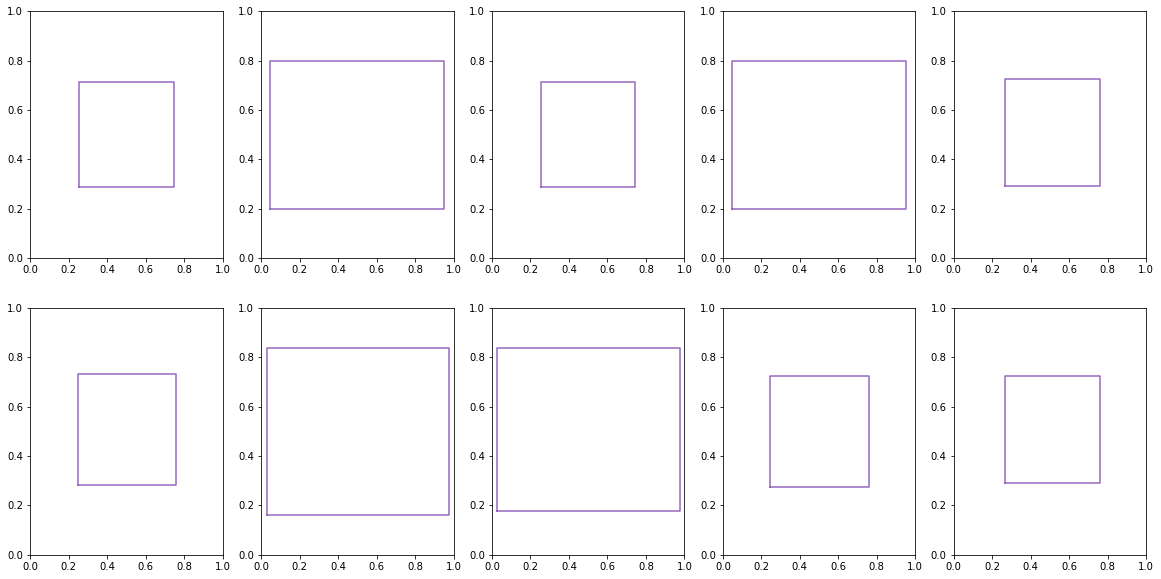

In [127]:
plot_all_boxes(X_test[disconnected_idx[0][:10],:,1:])

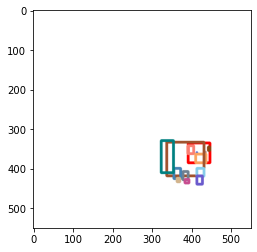

In [95]:
canvas_size=550
plt.imshow(plot_bbx(X_test[13,:,1:]*1.4))

In [96]:
1.2*550

660.0